In [ ]:
from google.colab import drive
import os.path

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
csv_path = os.path.join('gdrive','MyDrive','Machine Learning','Covid19stats.csv')

In [ ]:
import pandas as pd
df = pd.read_csv(csv_path,encoding='utf-8',index_col='จังหวัด')

In [ ]:
df.T.iloc[0,:]

จังหวัด
กรุงเทพมหานคร      156
เชียงใหม่            2
ชลบุรี              18
ประจวบคีรีขันธ์      0
นนทบุรี              1
                  ... 
มุกดาหาร             0
ยะลา                 0
พิจิตร               0
ชัยนาท               0
สตูล                 0
Name: 6-เม.ย., Length: 77, dtype: int64

In [ ]:
date = pd.to_datetime([i+1 for i in range(0,len(df.columns))], unit='D',
               origin=pd.Timestamp('2021-04-05'))

In [ ]:
df = df.T

In [ ]:
df['date'] = date

In [ ]:
df.set_index('date',inplace=True)
df = df.T

In [ ]:
df_bkk = pd.DataFrame()
df_bkk['infection_rate'] = df.loc['กรุงเทพมหานคร',:]

In [ ]:
df.loc['กรุงเทพมหานคร',:]

date
2021-04-06     156
2021-04-07     216
2021-04-08      95
2021-04-09     266
2021-04-10     185
2021-04-11     236
2021-04-12     137
2021-04-13     194
2021-04-14     351
2021-04-15     409
2021-04-16     312
2021-04-17     279
2021-04-18     346
2021-04-19     293
2021-04-20     350
2021-04-21     365
2021-04-22     446
2021-04-23     740
2021-04-24    1582
2021-04-25    1078
2021-04-26     901
2021-04-27     993
2021-04-28     830
2021-04-29     689
2021-04-30     417
Name: กรุงเทพมหานคร, dtype: int64

In [ ]:
df_bkk

,infection_rate
date,
2021-04-06,156
2021-04-07,216
2021-04-08,95
2021-04-09,266
2021-04-10,185
2021-04-11,236
2021-04-12,137
2021-04-13,194
2021-04-14,351


In [ ]:
df_bkk['infection_rate+1'] = df_bkk['infection_rate'].shift(-1)

In [ ]:
df_bkk

,infection_rate,infection_rate+1
date,,
2021-04-06,156,216.0
2021-04-07,216,95.0
2021-04-08,95,266.0
2021-04-09,266,185.0
2021-04-10,185,236.0
2021-04-11,236,137.0
2021-04-12,137,194.0
2021-04-13,194,351.0
2021-04-14,351,409.0


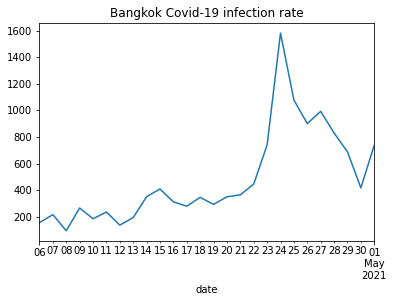

In [ ]:
df.iloc[0,:].plot(title = 'Bangkok Covid-19 infection rate',figsize=(6,4)) ### df.loc[province,:].plot()

In [ ]:
df

date,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-10,2021-04-11,2021-04-12,2021-04-13,2021-04-14,2021-04-15,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30
จังหวัด,,,,,,,,,,,,,,,,,,,,,,,,,
กรุงเทพมหานคร,156,216,95,266,185,236,137,194,351,409,312,279,346,293,350,365,446,740,1582,1078,901,993,830,689,417
เชียงใหม่,2,2,6,16,168,189,246,251,319,278,272,140,164,197,116,134,99,237,151,163,84,149,161,151,138
ชลบุรี,18,11,14,46,101,180,92,97,72,98,110,99,229,98,82,80,97,125,119,75,104,93,108,112,131
ประจวบคีรีขันธ์,0,6,14,30,40,49,52,73,161,98,100,58,66,23,41,69,118,44,96,115,97,93,71,89,66
นนทบุรี,1,8,18,6,1,19,2,0,9,35,61,349,140,39,60,47,37,29,84,77,110,80,59,28,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
มุกดาหาร,0,0,0,0,1,0,1,0,0,1,1,2,1,0,0,0,0,0,0,0,0,0,0,2,0
ยะลา,0,0,0,0,0,0,0,0,0,2,0,3,2,0,0,0,2,1,0,2,4,0,0,1,0
พิจิตร,0,0,0,0,1,0,2,0,0,0,0,3,0,0,0,0,0,4,0,2,2,0,0,1,0


In [ ]:
### Find d from p, d, q ###
from statsmodels.tsa.stattools import adfuller

adf_res = adfuller(df.iloc[0,:], autolag = 'AIC')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(adf_res)
print('p-Values:' + str(adf_res[1]))
### This is non-stationary data ###

(3.3771919476501497, 1.0, 9, 15, {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}, 201.58993329154055)
p-Values:1.0


date
2021-04-06       NaN
2021-04-07       NaN
2021-04-08    -181.0
2021-04-09     292.0
2021-04-10    -252.0
2021-04-11     132.0
2021-04-12    -150.0
2021-04-13     156.0
2021-04-14     100.0
2021-04-15     -99.0
2021-04-16    -155.0
2021-04-17      64.0
2021-04-18     100.0
2021-04-19    -120.0
2021-04-20     110.0
2021-04-21     -42.0
2021-04-22      66.0
2021-04-23     213.0
2021-04-24     548.0
2021-04-25   -1346.0
2021-04-26     327.0
2021-04-27     269.0
2021-04-28    -255.0
2021-04-29      22.0
2021-04-30    -131.0
Name: กรุงเทพมหานคร, dtype: float64
d:2
p-Values:0.015371657937841105


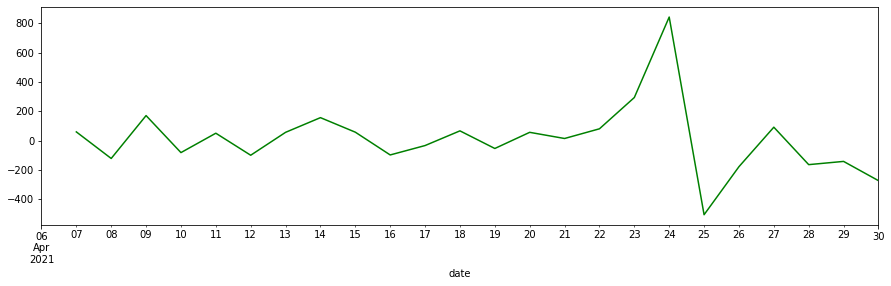

In [ ]:
import matplotlib.pyplot as plt


df_d = pd.DataFrame()
df_d['Close_diff'] = df.iloc[0,:].diff(1)
df_d['Close_diff'].plot(color = 'green', figsize = (15,4))
#plt.legend(['Bangkok (diff)'])
#plt.title('Covid-19 infection rate (diff)')
d_new = df.iloc[0,:]
num = 0
while True:
  if num != 0:
    d_new = []
    d_new = d_old.diff(1)
  adf_res = adfuller(d_new.dropna(), autolag = 'AIC')
  if adf_res[1] < 0.05:
    print(d_new)
    df_d['Close_diff'] = d_new
    break
  else:
    num += 1
    d_old = d_new
  #print(d_new)

#adf_res = adfuller(df_d['Close_diff'].dropna(), autolag = 'AIC')
print('d:' + str(num))
print('p-Values:' + str(adf_res[1]))
### p < 0.05 stationary now -> d = 2 ###

In [ ]:
df_d

,Close_diff
date,
2021-04-06,NaN
2021-04-07,NaN
2021-04-08,-181.0
2021-04-09,292.0
2021-04-10,-252.0
2021-04-11,132.0
2021-04-12,-150.0
2021-04-13,156.0
2021-04-14,100.0


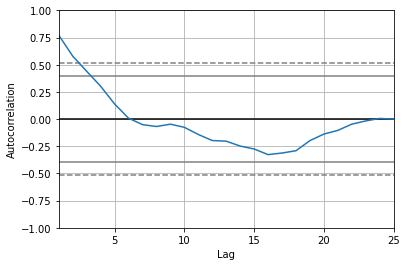

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.iloc[0,:])
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#model=ARIMA(df_d['Close_diff'].dropna(),order=(1,num,0))
#model_fit=model.fit()

In [ ]:
#model_fit.summary()

In [ ]:
#df_predict = pd.DataFrame()
#df_predict['Ground_truth'] = df.iloc[0,:]

df_predict['forecast']=model_fit.predict(start=ๅ,end=15,dynamic=True)
df_predict[['Ground_truth','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df.iloc[0,:].cumsum(),order=(1, 0, 0),seasonal_order=(1,0,0,7))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


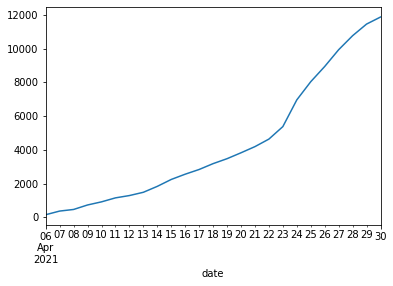

In [ ]:
df.iloc[0,:].cumsum().plot()

In [ ]:
df_predict = pd.DataFrame()
df_predict['Ground_truth'] = df.iloc[0,:].cumsum()
df_predict

,Ground_truth
date,
2021-04-06,156
2021-04-07,372
2021-04-08,467
2021-04-09,733
2021-04-10,918
2021-04-11,1154
2021-04-12,1291
2021-04-13,1485
2021-04-14,1836


In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_predict.index[-1]+ DateOffset(days=x)for x in range(0,8)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_predict.columns)

In [ ]:
future_datest_df

,Ground_truth
2021-05-01,NaN
2021-05-02,NaN
2021-05-03,NaN
2021-05-04,NaN
2021-05-05,NaN
2021-05-06,NaN
2021-05-07,NaN


In [ ]:
future_df=pd.concat([df_predict,future_datest_df])

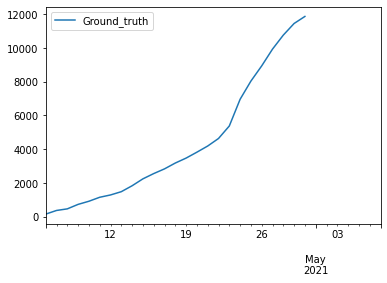

In [ ]:
future_df.plot()

Text(0.5, 1.0, 'Covid-19 Infected rate per day (Bangkok)')

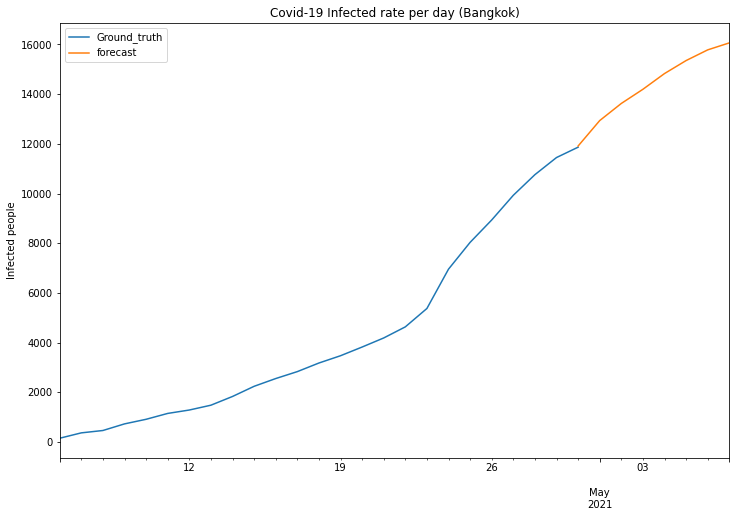

In [ ]:
import numpy as np
future_df['forecast']=results.predict(start=24,end=len(df.columns)+7,dynamic=True)
#future_df['forecast']=results.predict(start=14,end=20,dynamic=True)
future_df['forecast']=results.fittedvalues
future_df.iloc[len(df.columns)-1,1] = future_df.iloc[len(df.columns)-1,0]
future_df = np.round(future_df)
future_df[['Ground_truth','forecast']].plot(figsize=(12,8))
plt.ylabel('Infected people')
plt.title('Covid-19 Infected rate per day (Bangkok)')

In [ ]:
future_df

,Ground_truth,forecast
2021-04-06,156,0.0
2021-04-07,216,155.0
2021-04-08,95,215.0
2021-04-09,266,96.0
2021-04-10,185,264.0
2021-04-11,236,186.0
2021-04-12,137,235.0
2021-04-13,194,218.0
2021-04-14,351,253.0
2021-04-15,409,222.0


In [ ]:
future_df_drop = future_df.copy()
future_df_drop = future_df_drop.dropna()
future_df_drop

,Ground_truth,forecast
2021-04-06,156,0.0
2021-04-07,216,155.0
2021-04-08,95,215.0
2021-04-09,266,96.0
2021-04-10,185,264.0
2021-04-11,236,186.0
2021-04-12,137,235.0
2021-04-13,194,218.0
2021-04-14,351,253.0
2021-04-15,409,222.0


In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(future_df_drop.Ground_truth, future_df_drop.forecast)
print("Mean Absolute Error : %.3f"%MAE)
#164.905

Mean Absolute Error : 164.905


In [ ]:
#!pip install pmdarima

In [ ]:
#AUTO ARIMA
#from pmdarima.arima import auto_arima
#arima_model = auto_arima(df.iloc[0,:],start_p=0, d=1, start_q=0, 
#                          max_p=5, max_d=5, max_q=5, start_P=0, 
#                          D=1, start_Q=0, max_P=5, max_D=5,
#                          max_Q=5, m=7, seasonal=True, 
#                          error_action='warn',trace = True,
#                          supress_warnings=True,stepwise = True,
#                          random_state=20,n_fits = 50 )
